In [2]:
import numpy as np
import matplotlib.pyplot as plt
import librosa.display

# Load the audio file
audio_file = "lai4_FV2_MP3.mp3"

# Load the audio data using librosa
audio, sr = librosa.load(audio_file)

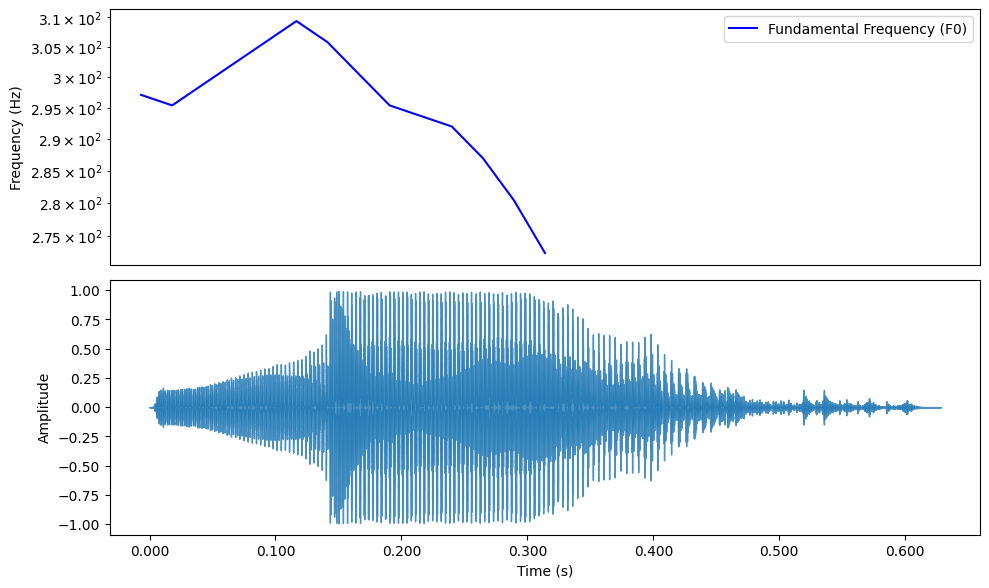

In [3]:
# Calculate the pitch using the fundamental frequency (f0)
f0, voiced_flag, voiced_probs = librosa.pyin(audio, fmin=librosa.note_to_hz('C2'), fmax=librosa.note_to_hz('C7'))

# Plot the pitch
plt.figure(figsize=(10, 6))
plt.subplot(2, 1, 1)
plt.semilogy(f0, label='Fundamental Frequency (F0)', color='b')
plt.ylabel('Frequency (Hz)')
plt.xticks([])
plt.xlim([0, len(f0)])
plt.legend(loc='upper right')

# Display the audio waveform
plt.subplot(2, 1, 2)
librosa.display.waveshow(audio, alpha=0.8)
plt.ylabel('Amplitude')
plt.xlabel('Time (s)')

plt.tight_layout()
plt.show()

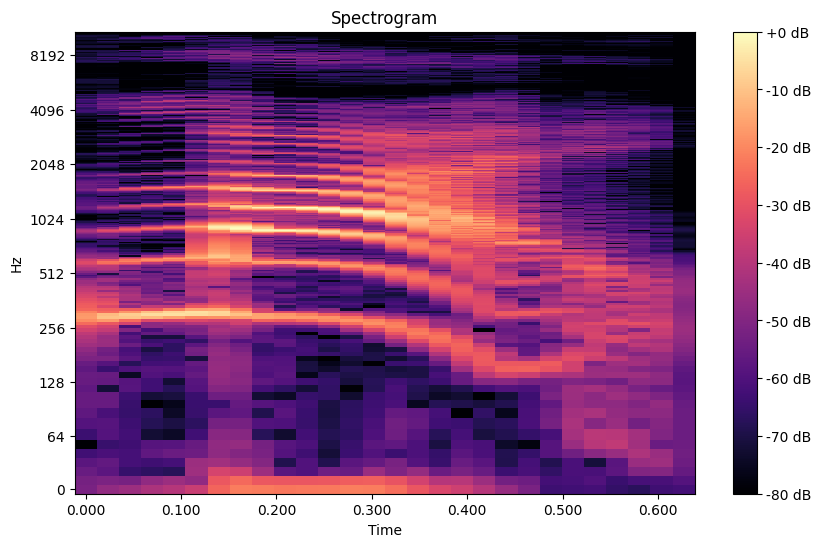

In [4]:
# Compute the short-time Fourier transform (STFT)
D = librosa.stft(audio)

# Compute the magnitude spectrum
magnitude = np.abs(D)

# Convert to dB scale
log_magnitude = librosa.amplitude_to_db(magnitude, ref=np.max)

# Plot the spectrum
plt.figure(figsize=(10, 6))
librosa.display.specshow(log_magnitude, sr=sr, x_axis='time', y_axis='log')
plt.colorbar(format='%+2.0f dB')
plt.title('Spectrogram')
plt.show()